In [12]:
import pandas as pd
import numpy as np
import math
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot as plt
from statsmodels.tsa.x13 import x13_arima_analysis
import datetime

In [13]:
#You can change dataset here
dataset = 'EXUSEU'
data = pd.read_csv('Data/'+dataset+".csv")
tsValues = list(data[dataset])
startPrediction = 100
totalData = len(tsValues)
#log data
tsValuesLog = [math.log(ele) for ele in tsValues]
#first difference
tsValuesLog_d_1 = [0]
tsValuesLog_d_1 += [tsValuesLog[i+1]-tsValuesLog[i] for i in range(totalData-1)]

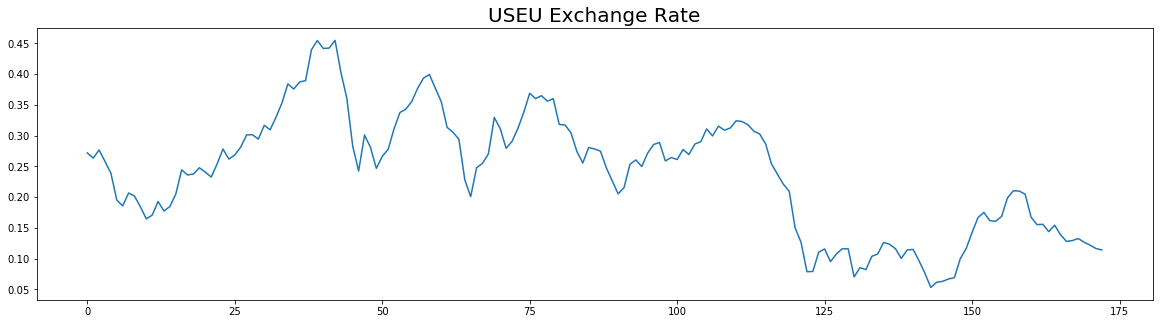

In [14]:
#See the picture
plt.figure(figsize=(20,5))
plt.plot(tsValuesLog)
plt.title(dataset[2:]+" Exchange Rate",fontsize=20)
plt.show()

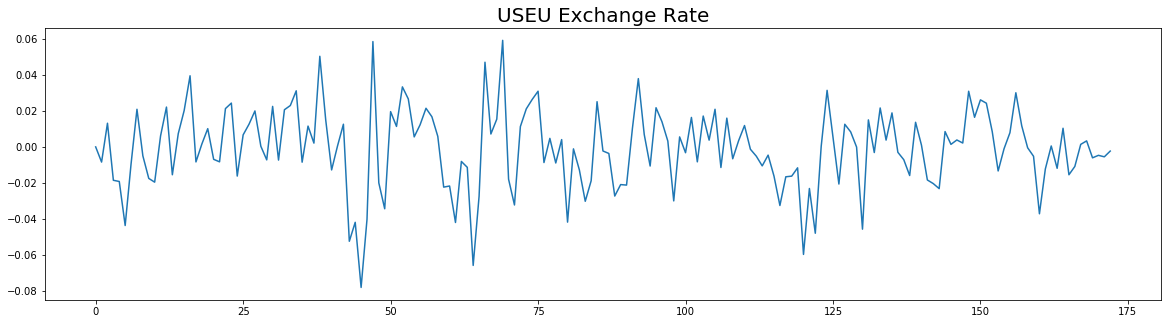

In [24]:
plt.figure(figsize=(20,5))
plt.plot(tsValuesLog_d_1)
plt.title(dataset[2:]+" Exchange Rate",fontsize=20)
plt.show()

In [16]:
print("Raw Data")
adfuller(tsValuesLog,regression='c')

Raw Data


(-1.8050517607805057,
 0.37795653468888124,
 1,
 171,
 {'1%': -3.4691814633722453,
  '10%': -2.5758625549741803,
  '5%': -2.8785951435329431},
 -759.858925504627)

In [29]:
for i in range(50,170,10):
    print(adfuller(tsValuesLog[:i]))

(-1.3636719411673013, 0.59956308893195143, 1, 48, {'1%': -3.5745892596209488, '5%': -2.9239543084490744, '10%': -2.6000391840277777}, -165.67109436746046)
(-1.4685803685121486, 0.54899300033340526, 1, 58, {'1%': -3.548493559596539, '5%': -2.9128365947763339, '10%': -2.5941291557669439}, -217.35026313364898)
(-2.3527026495351744, 0.15553291860614893, 3, 66, {'1%': -3.5335601309235605, '5%': -2.9064436883991434, '10%': -2.590723948576676}, -258.46202502075738)
(-2.3266527052960697, 0.16351595841218769, 3, 76, {'1%': -3.5194805351545413, '5%': -2.9003945086747343, '10%': -2.5874984279778395}, -301.39744984410572)
(-2.4978115798476659, 0.11600769942100175, 3, 86, {'1%': -3.5087828609430614, '5%': -2.8957835615731948, '10%': -2.5850381719848565}, -348.71473168386069)
(-2.6822292111183095, 0.077164196489453704, 3, 96, {'1%': -3.5003788874873405, '5%': -2.8921519665075235, '10%': -2.5830997960069446}, -399.46261368992231)
(-2.5695045185591474, 0.099465271922536236, 1, 108, {'1%': -3.492401259

In [27]:
print("First Difference")
adfuller(tsValuesLog_d_1,regression='c',)

First Difference


(-9.9183820636160434,
 3.0368512363889321e-17,
 0,
 172,
 {'1%': -3.4689521978017659,
  '10%': -2.5758091360194699,
  '5%': -2.8784950564730152},
 -819.45829815298612)

In [32]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(tsValuesLog, lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(tsValuesLog, lags=40, ax=ax2)
fig.savefig("Figure/EU_acf_pacf.jpg")

In [31]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(tsValuesLog_d_1, lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(tsValuesLog_d_1, lags=40, ax=ax2)
fig.savefig("Figure/EU_d_1acf_pacf.jpg")

C:\Users\v-weiyzh\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


<Figure size 1440x360 with 0 Axes>

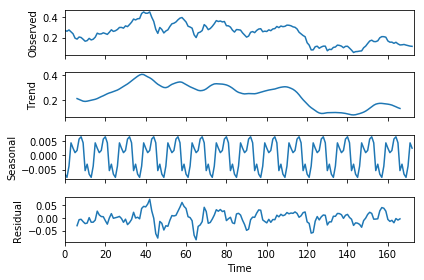

In [11]:
decomp = seasonal_decompose(tsValuesLog,freq=12)
fig = plt.figure(figsize=(20,5))
fig = decomp.plot()
fig.show()

In [22]:
np.max(decomp.seasonal)

0.0065765337347237444

In [21]:
np.max(decomp.observed)

0.45482653764588854

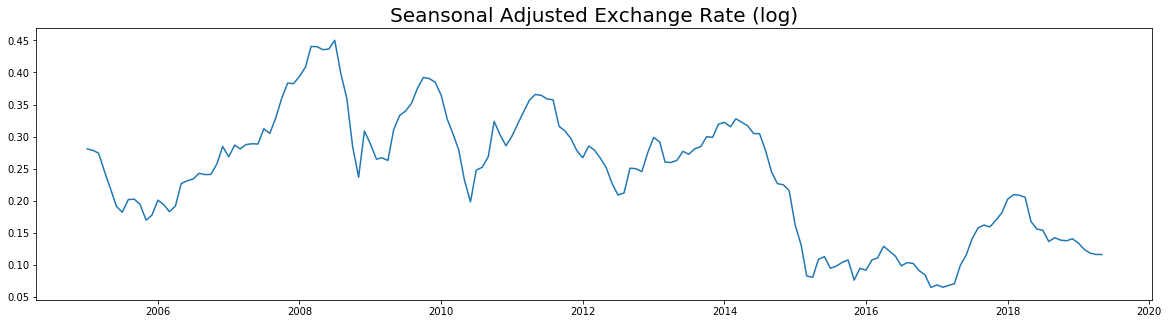

In [12]:
date = [datetime.datetime.strptime(ele,'%Y-%m-%d') for ele in data['observation_date']]
ts = pd.DataFrame(index = date)
ts['tsValuesLog'] = tsValuesLog
model = x13_arima_analysis(ts)
tsValuesLog_seasadj = list(model.seasadj)
plt.figure(figsize=(20,5))
plt.plot(model.seasadj)
plt.title("Seansonal Adjusted Exchange Rate (log)",fontsize = 20)
plt.show()